In [136]:
# - Importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [137]:
# - Reading the csv file

golddata = pd.read_csv('gold.csv')

In [138]:
# - Printing the first 10 rows of the dataframe

golddata.head(10)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD
5,2000-01-11,282.4,285.3,281.9,284.4,13500,USD
6,2000-01-12,284.5,285.0,282.5,283.7,17841,USD
7,2000-01-13,283.5,285.9,282.9,285.1,12171,USD
8,2000-01-14,285.2,285.6,284.0,284.9,32339,USD
9,2000-01-18,286.1,289.8,285.9,289.6,28615,USD


In [139]:
# - Information of data

golddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


In [140]:
# - Splitting the 'Year', 'Month' and 'Date' into 3 columns

date_split = golddata['Date'].str.split('-', expand=True)

golddata['Day'] = date_split[2].astype(int)
golddata['Month'] = date_split[1].astype(int)
golddata['Year'] = date_split[0].astype(int)

In [141]:
# - Dropping the 'Date' column

golddata = golddata.drop(columns='Date')

In [142]:
golddata['Price'] = (golddata['High'] + golddata['Low']) / 2

In [143]:
# - Shape of the dataframe

golddata.shape

(5703, 10)

In [144]:
# - Checking the NULL values

golddata.isnull().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
Day         0
Month       0
Year        0
Price       0
dtype: int64

In [145]:
golddata

,Open,High,Low,Close,Volume,Currency,Day,Month,Year,Price
0,289.5,289.50,280.00,283.7,21621,USD,4,1,2000,284.75
1,283.7,285.00,281.00,282.1,25448,USD,5,1,2000,283.00
2,281.6,282.80,280.20,282.4,19055,USD,6,1,2000,281.50
3,282.5,284.50,282.00,282.9,11266,USD,7,1,2000,283.25
4,282.4,283.90,281.80,282.7,30603,USD,10,1,2000,282.85
...,...,...,...,...,...,...,...,...,...,...
5698,1748.4,1757.90,1731.40,1749.7,156220,USD,29,8,2022,1744.65
5699,1749.8,1752.80,1732.90,1736.3,130664,USD,30,8,2022,1742.85
5700,1735.5,1738.00,1720.60,1726.2,176731,USD,31,8,2022,1729.30
5701,1723.0,1723.00,1699.10,1709.3,198618,USD,1,9,2022,1711.05


In [146]:
# - Statistical information of dataframe

golddata.describe()

,Open,High,Low,Close,Volume,Day,Month,Year,Price
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297,15.715062,6.483605,2010.859022,1040.101175
std,518.733377,522.353946,514.455903,518.524020,102537.449058,8.756878,3.411974,6.537251,518.376135
min,256.600000,259.400000,255.100000,256.600000,0.000000,1.000000,1.000000,2000.000000,257.650000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000,8.000000,4.000000,2005.000000,460.825000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000,16.000000,6.000000,2011.000000,1188.200000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000,23.000000,9.000000,2017.000000,1380.150000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000,31.000000,12.000000,2022.000000,2065.400000


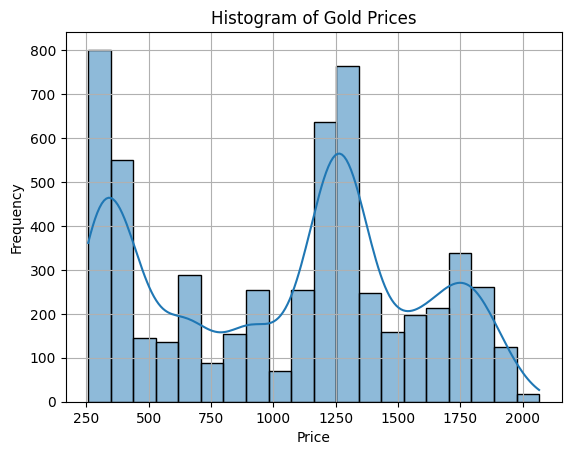

In [147]:
sns.histplot(data=golddata, x='Price', bins=20, kde=True)
plt.title('Histogram of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [148]:
# - Calculating the correlation matrix

correlation_matrix = golddata.corr()

<ipython-input-148-c3737c6381c3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = golddata.corr()


Text(0.5, 1.0, 'Seaborn Correlation Heatmap')

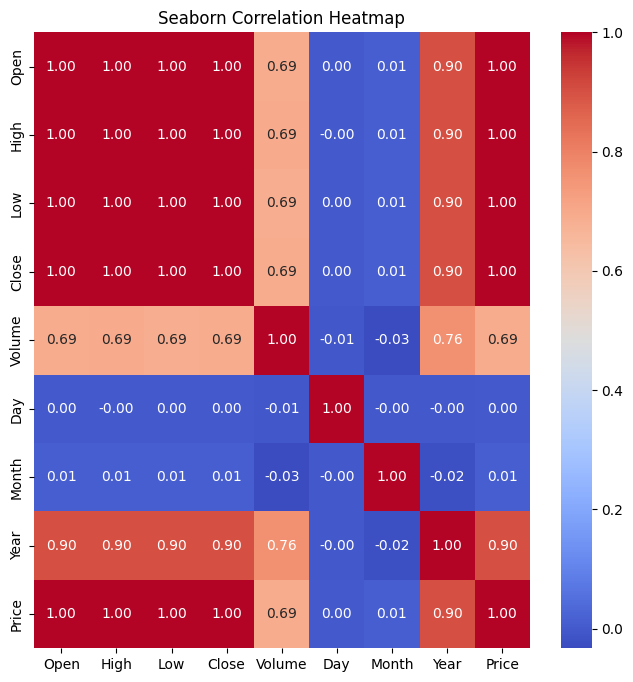

In [149]:
# - Creating the seaborn heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Seaborn Correlation Heatmap')

In [150]:
# - Calculating the correlation matrix for Price

correlation_matrix_gld = golddata.corr()['Price']

<ipython-input-150-d936eef93e40>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_gld = golddata.corr()['Price']


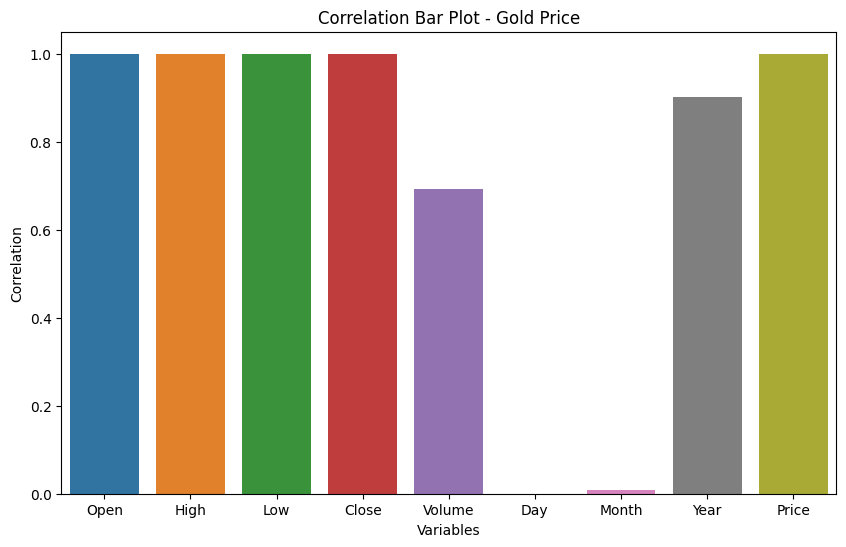

In [151]:
# - Creating the bar plot for Price

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix_gld.index, y=correlation_matrix_gld.values)

plt.title("Correlation Bar Plot - Gold Price")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.show()

In [152]:
# - Splitting the columns

X = golddata.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price', 'Currency'])
y = golddata['Price']

In [153]:
# - Splitting the datafrane to Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [154]:
# - Creating an XGBoost regressor model

xgb_model = xgb.XGBRegressor(
    n_estimators = 100,
    max_depth = 3,
    learning_rate = 0.1,
    random_state = 4
)

In [155]:
# - Training the model using XGBRegressor

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=4, ...)

In [156]:
# - Predicting the values for X_test

predictions = xgb_model.predict(X_test)

In [157]:
# - Evaluating the model

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
r2 = metrics.r2_score(y_test, predictions)

In [158]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

Mean Absolute Error (MAE): 31.0026
Mean Squared Error (MSE): 2167.0127
Root Mean Squared Error (RMSE): 46.5512
R-squared (R2) score: 0.9920


In [159]:
# - Saving the model

joblib.dump(xgb_model, 'xgboost_model_daily_gold_price.pkl')

['xgboost_model_daily_gold_price.pkl']